> Copyright 2025 Giovanni Squillero <<giovanni.squillero@polito.it>>  
> SPDX-License-Identifier: `0BSD`

In [1]:
from random import choice, randint, random
from tqdm.autonotebook import tqdm
import pandas as pd
import seaborn as sns

/var/folders/g4/jsfj0k8x6rj21bygpnmzqb940000gn/T/ipykernel_15197/2103209565.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# Soluzione: array di PROBLEM_SIZE elementi
# Goal: array di tutti True

PROBLEM_SIZE = 256


def fitness(solution):
    return sum(solution)

In [3]:
initial_solution = [choice([True, False]) for _ in range(PROBLEM_SIZE)]

## Local search (hill-climbing)

In [4]:
## Local search (hill-climbing)
def tweak(sol, p):
    new_sol = sol[:]
    i = randint(0, PROBLEM_SIZE - 1)
    new_sol[i] = not new_sol[i]
    while random() < p:
        i = randint(0, PROBLEM_SIZE - 1)
        new_sol[i] = not new_sol[i]
    return new_sol


data = pd.DataFrame(columns=['Ms', 'Eval'])
for m in tqdm(range(10)):
    mutation_strength = m / 20
    for _ in range(1000):
        tries = 0
        best_solution = initial_solution[:]
        while fitness(best_solution) < PROBLEM_SIZE:
            tries += 1
            solution = tweak(best_solution, mutation_strength)
            if fitness(solution) > fitness(best_solution):
                best_solution = solution[:]
        data.loc[len(data)] = [mutation_strength, tries]
#sns.scatterplot(x=data[0], y=data[1], marker='.')

  0%|          | 0/10 [00:00<?, ?it/s]

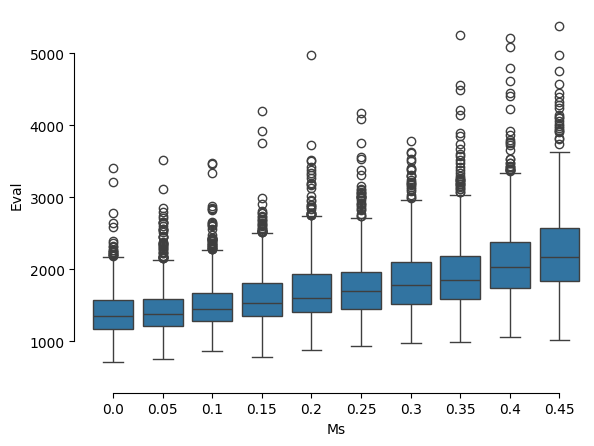

In [5]:
sns.boxplot(x='Ms', y="Eval", data=data)
sns.despine(offset=10, trim=True)